In [1]:
import pandas as pd

df=pd.read_csv('/content/Grammar Correction.csv', sep=',')

print(f'Data shape = {df.shape}')

df.head()

Data shape = (2018, 4)


,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


In [2]:
# summary of the dataset
summary = df.describe(include='all')
summary

,Serial Number,Error Type,Ungrammatical Statement,Standard English
count,2018.000000,2018,2018,2018
unique,NaN,36,2016,2009
top,NaN,Sentence Structure Errors,The plants needs to be watered every day.,The Earth revolves around the Sun.
freq,NaN,103,2,2
mean,1009.500000,NaN,NaN,NaN
std,582.690741,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,505.250000,NaN,NaN,NaN
50%,1009.500000,NaN,NaN,NaN
75%,1513.750000,NaN,NaN,NaN


In [3]:
#finding null values of the dataset

missing_values = df.isnull().sum()
missing_values

,0
Serial Number,0
Error Type,0
Ungrammatical Statement,0
Standard English,0


In [4]:
#cleaning the dataset

In [5]:
#removing duplicates
df_new = df.drop_duplicates()
print(f"old dataset's shape= {df.shape}")
print(f"new dataset's shape= {df_new.shape}")

old dataset's shape= (2018, 4)
new dataset's shape= (2018, 4)


In [6]:
#Standardize the text format

In [7]:
df.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


In [8]:
# removing leading spaces

df_new['Ungrammatical Statement'] = df_new['Ungrammatical Statement'].str.strip()
df_new['Standard English'] = df_new['Standard English'].str.strip()

In [9]:
# striping unwanted characters like numbers at the start
df_new['Ungrammatical Statement'] = df_new['Ungrammatical Statement'].str.replace(r'^\d+\.\s', '', regex=True)
df_new['Standard English'] = df_new['Standard English'].str.replace('^\d+\.\s+', '', regex=True)

In [10]:
print(f"new dataset's shape= {df_new.shape}")

new dataset's shape= (2018, 4)


In [11]:
# number of each type of grammatical error

error_counts = df_new['Error Type'].value_counts()
error_counts

,count
Error Type,
Sentence Structure Errors,103
Verb Tense Errors,100
Subject-Verb Agreement,100
Article Usage,100
Spelling Mistakes,100
Preposition Usage,95
Punctuation Errors,60
Relative Clause Errors,51
Gerund and Participle Errors,50


In [12]:
#analyzing the length of sentences in 'Ungrammatical Statement' and 'Standard English'
df_new['Ungrammatical Statement Length'] = df_new['Ungrammatical Statement'].apply(len)
df_new['Standard English Length'] = df_new['Standard English'].apply(len)

In [13]:
df_new.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Statement Length,Standard English Length
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

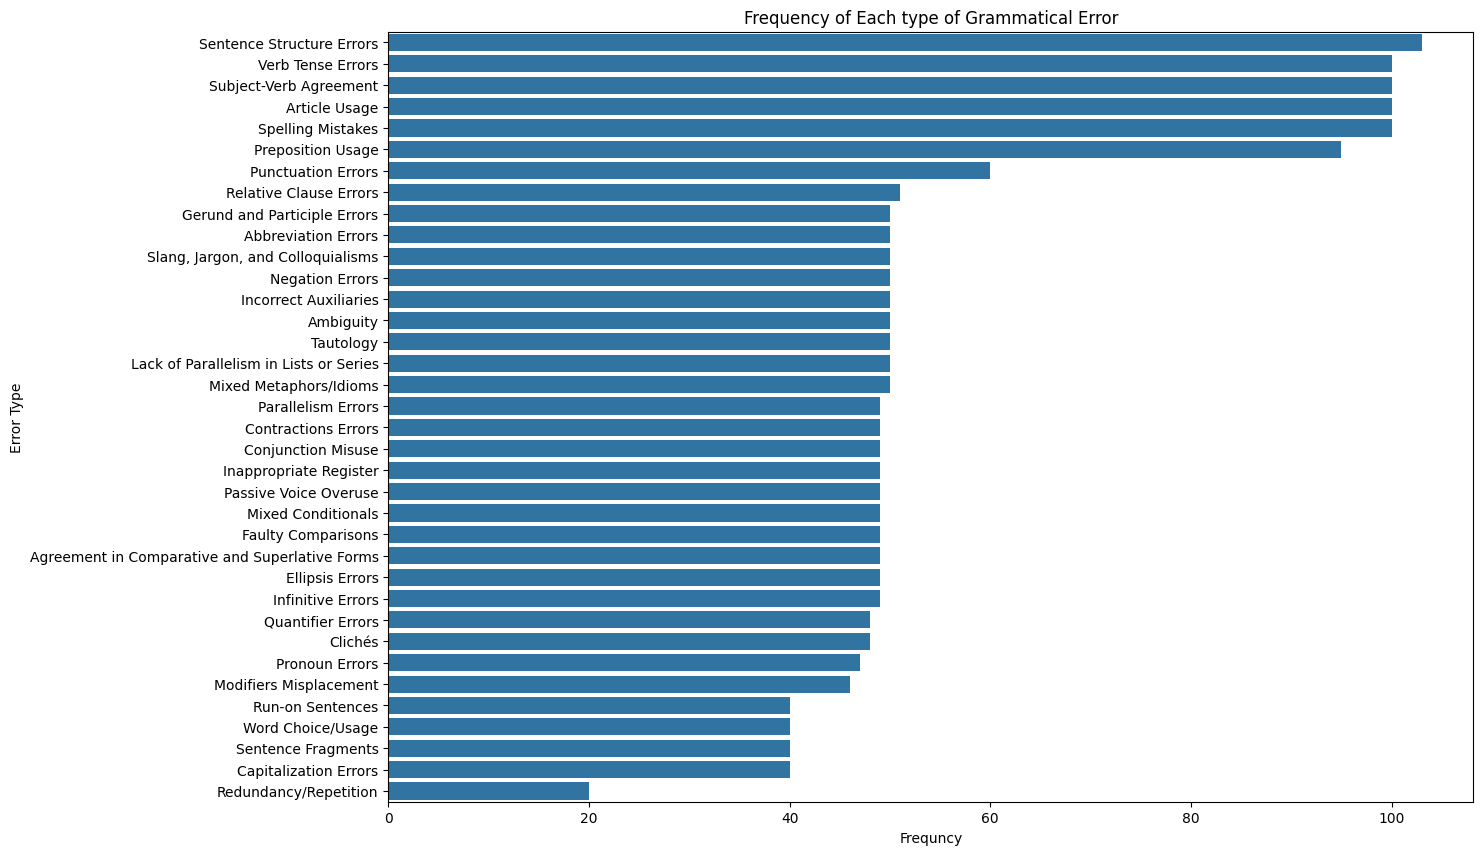

In [15]:
# visualizing the distributions of error types
plt.figure(figsize=(14,10))
error_type_plot = sns.countplot(y=df_new['Error Type'], order=df_new['Error Type'].value_counts().index)
error_type_plot.set_title('Frequency of Each type of Grammatical Error')
error_type_plot.set_xlabel('Frequncy')
error_type_plot.set_ylabel('Error Type')

sns.set_style("dark")

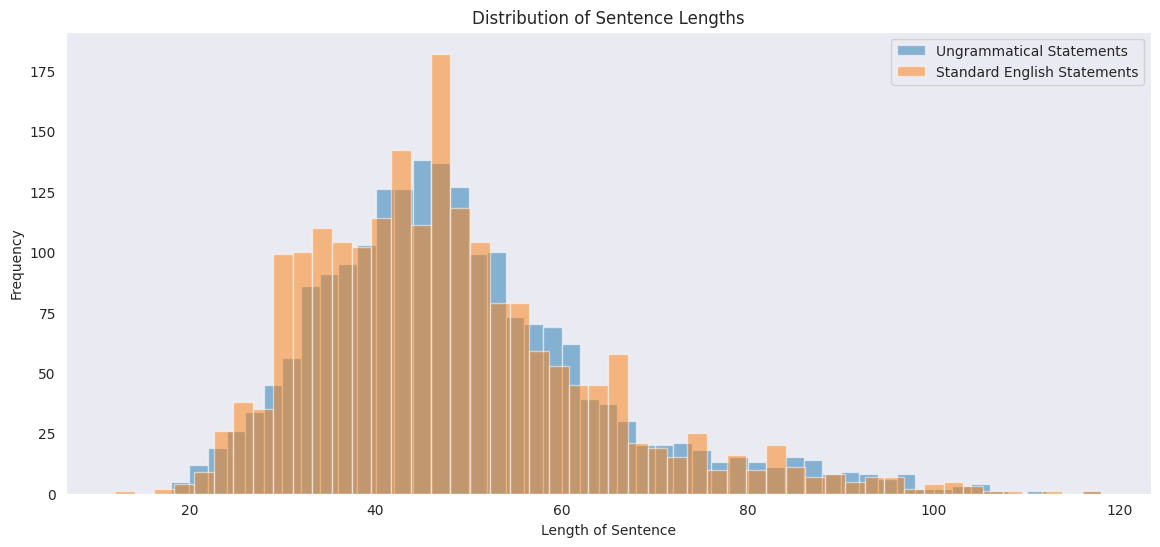

In [16]:
# visualization of the sentence lenght in both columns
plt.figure(figsize=(14,6))
plt.hist(df_new['Ungrammatical Statement Length'], bins=50, alpha=0.5, label='Ungrammatical Statements')
plt.hist(df_new['Standard English Length'], bins=50, alpha=0.5, label='Standard English Statements')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Length of Sentence')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [17]:
#### word frequncey analysis ####

In [18]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

#functions to calculate word frequency
def word_frequency(sentences):
  words = []
  for sentence in sentences:
    words.extend(word_tokenize(sentence.lower()))
  return Counter(words)

#calculating word frequency for botth ungrammatical and corrected statments
ungrammatical_freq = word_frequency(df_new['Ungrammatical Statement'])
corrected_freq = word_frequency(df_new['Standard English'])

#getting the top 20 most frequent words in each category
top_ungrammatical = ungrammatical_freq.most_common(20)
top_corrected = corrected_freq.most_common(20)

print(top_ungrammatical)
print(top_corrected)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('the', 2079), ('.', 1973), (',', 619), ('to', 518), ('a', 504), ('is', 475), ('was', 357), ('and', 304), ('i', 279), ('of', 277), ('in', 270), ('she', 258), ("'s", 246), ('he', 217), ('it', 204), ('for', 155), ('on', 148), ('by', 132), ("n't", 131), ('they', 118)]
[('the', 2118), ('.', 1972), (',', 542), ('to', 493), ('is', 453), ('a', 379), ('and', 341), ('was', 321), ('i', 293), ('in', 263), ('she', 256), ('of', 230), ('he', 214), ("'s", 170), ('for', 151), ('on', 134), ('at', 133), ("n't", 117), ('are', 112), ('it', 101)]


  Word  Frequency
0  the       2079
1    .       1973
2    ,        619
3   to        518
4    a        504
  Word  Frequency
0  the       2118
1    .       1972
2    ,        542
3   to        493
4   is        453


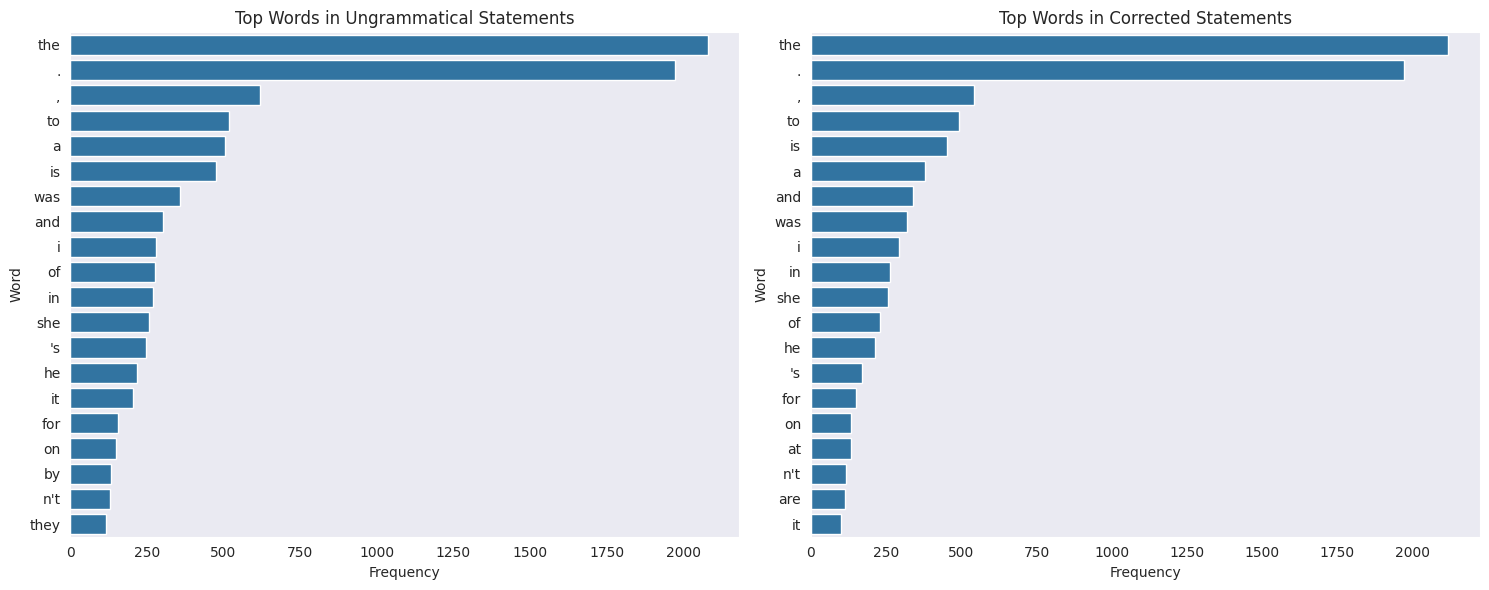

In [19]:
top_ungrammatical_df = pd.DataFrame(top_ungrammatical, columns=['Word', 'Frequency'])
top_corrected_df = pd.DataFrame(top_corrected, columns=['Word', 'Frequency'])

print(top_ungrammatical_df.head())
print(top_corrected_df.head())

#bar plot
plt.figure(figsize=(15,6))

#ungrammatical Statements
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=top_ungrammatical_df)
plt.title('Top Words in Ungrammatical Statements')

#corrected statements
plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=top_corrected_df)
plt.title('Top Words in Corrected Statements')

plt.tight_layout()
plt.show()

In [20]:
# part of speech

In [21]:
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

def pos_tag_sentences(sentences):
    tagged_sentences = []
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        tagged = pos_tag(tokens)
        tagged_sentences.extend(tagged)
    return tagged_sentences

tagged_ungrammatical = pos_tag_sentences(df_new['Ungrammatical Statement'])
tagged_corrected = pos_tag_sentences(df_new['Standard English'])

#counting the frequecny of each POS tag
ungrammatical_pos_counts = pd.Series([tag for _, tag in tagged_ungrammatical]). value_counts()
corrected_pos_counts = pd.Series([tag for _, tag in tagged_corrected]).value_counts()

print(ungrammatical_pos_counts)
print(corrected_pos_counts)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


NN      3828
DT      2877
.       2021
IN      1578
PRP     1307
JJ      1158
VBZ      972
NNS      938
VBD      868
VB       736
,        619
RB       588
TO       526
VBG      474
VBP      466
VBN      429
CC       422
PRP$     284
MD       227
NNP      209
POS      101
CD       101
RBR       79
JJR       70
:         53
WRB       52
RBS       47
RP        34
JJS       31
''        19
WDT       17
EX        15
WP        15
PDT        5
``         3
(          1
)          1
NNPS       1
Name: count, dtype: int64
NN      3666
DT      2769
.       2023
IN      1523
PRP     1162
JJ      1093
VBD      948
NNS      917
VBZ      878
VB       658
RB       550
,        542
VBG      525
TO       493
CC       432
VBP      412
VBN      385
PRP$     380
NNP      287
MD       200
CD       100
POS       80
JJR       61
WRB       59
RBR       57
JJS       44
:         35
RP        30
WP        27
WDT       22
EX        17
PDT       17
``         5
''         5
NNPS       5
(          3
)          3

In [22]:
# analyzing pos tags

      Ungrammatical  Corrected
''             19.0          5
(               1.0          3
)               1.0          3
,             619.0        542
.            2021.0       2023
:              53.0         35
CC            422.0        432
CD            101.0        100
DT           2877.0       2769
EX             15.0         17
FW              0.0          1
IN           1578.0       1523
JJ           1158.0       1093
JJR            70.0         61
JJS            31.0         44
MD            227.0        200
NN           3828.0       3666
NNP           209.0        287
NNPS            1.0          5
NNS           938.0        917
PDT             5.0         17
POS           101.0         80
PRP          1307.0       1162
PRP$          284.0        380
RB            588.0        550
RBR            79.0         57
RBS            47.0          2
RP             34.0         30
TO            526.0        493
VB            736.0        658
VBD           868.0        948
VBG     

<Figure size 2000x1400 with 0 Axes>

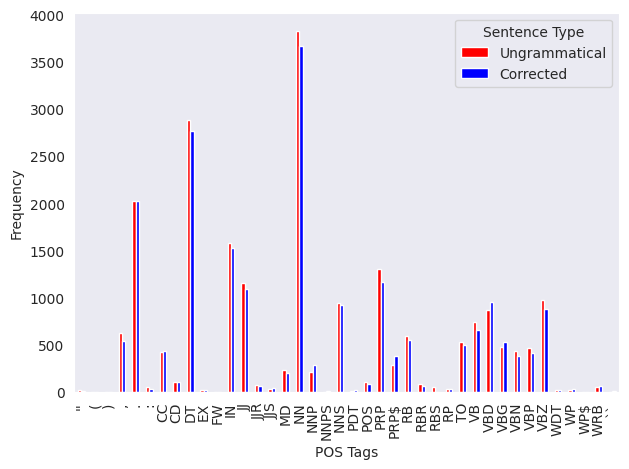

In [23]:
#converting dataframe for visualization

pos_df = pd.DataFrame({
    'Ungrammatical': ungrammatical_pos_counts,
    'Corrected': corrected_pos_counts
}).fillna(0)

print(pos_df)
#plot
plt.figure(figsize=(20,14))
pos_df.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Sentence Type')
plt.tight_layout()
plt.show()

In [24]:
pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.9 MB/s eta 0:00:00


In [25]:
import textstat

#compute the readability scores for ungrammatical sentences
ungrammatical_readability = [textstat.flesch_reading_ease(sentence) for sentence in df_new['Ungrammatical Statement']]

#compute the readability scores for corrected sentences
corrected_readability = [textstat.flesch_reading_ease(sentence) for sentence in df_new['Standard English']]

avg_ungrammatical_score = sum(ungrammatical_readability) / len(ungrammatical_readability)
avg_corrected_score = sum(corrected_readability) / len(corrected_readability)

print(f'Average Ungrammatical Readability = {avg_ungrammatical_score}')
print(f'Average Coorected Readability = {avg_corrected_score}')

Average Ungrammatical Readability = 82.42183845391477
Average Coorected Readability = 80.11340931615477


In [26]:
pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.7 MB/s eta 0:00:00


In [27]:
import numpy as np
from Levenshtein import distance as levenshtein_distance

#assuming 'ungrammatical_sentences' and 'corrected_sentences' are lists of sentences
difficulty_index = []

for ungrammatical, corrected in zip(df_new['Ungrammatical Statement'], df_new['Standard English']):
  edit_distance = levenshtein_distance(ungrammatical, corrected)
  normalized_difficulty = edit_distance / max(len(ungrammatical), len(corrected))
  difficulty_index.append(normalized_difficulty)

difficulty_index = np.array(difficulty_index)

difficulty_levels = ['Easy' if x < 0.2 else 'Medium' if x < 0.5 else 'Hard' for x in difficulty_index]

difficulty_counts = Counter(difficulty_levels)

difficulty_counts

Counter({'Easy': 1546, 'Medium': 371, 'Hard': 101})

In [28]:
## N-gram Analysis

In [29]:
from nltk import bigrams, trigrams
from collections import Counter

tokens = [nltk.word_tokenize(sentence.lower()) for sentence in df_new['Ungrammatical Statement']]

#bi-grams and tri-grams
bi_grams = [gram for sentence in tokens for gram in bigrams(sentence)]
tri_grams = [gram for sentence in tokens for gram in trigrams(sentence)]

#counting
bi_grams_freq = Counter(bi_grams)
tri_grams_freq = Counter(tri_grams)

#most common bi-grams and tri-grams
most_common_bi = bi_grams_freq.most_common(10)
most_common_tri = tri_grams_freq.most_common(10)

most_common_bi, most_common_tri

([(('in', 'the'), 142),
  ((',', 'and'), 142),
  ((',', 'but'), 100),
  (('to', 'the'), 87),
  (('of', 'the'), 82),
  (('by', 'the'), 79),
  (('it', "'s"), 75),
  (('at', 'the'), 60),
  (('on', 'the'), 53),
  (('the', 'store'), 45)],
 [((',', 'and', 'to'), 43),
  ((',', 'but', 'it'), 32),
  ((',', 'and', 'it'), 23),
  (('went', 'to', 'the'), 20),
  (('the', 'movie', 'was'), 19),
  ((',', 'it', "'s"), 19),
  (('to', 'the', 'store'), 18),
  (('but', 'it', 'is'), 18),
  (('the', 'group', 'of'), 15),
  (('is', 'the', 'most'), 15)])

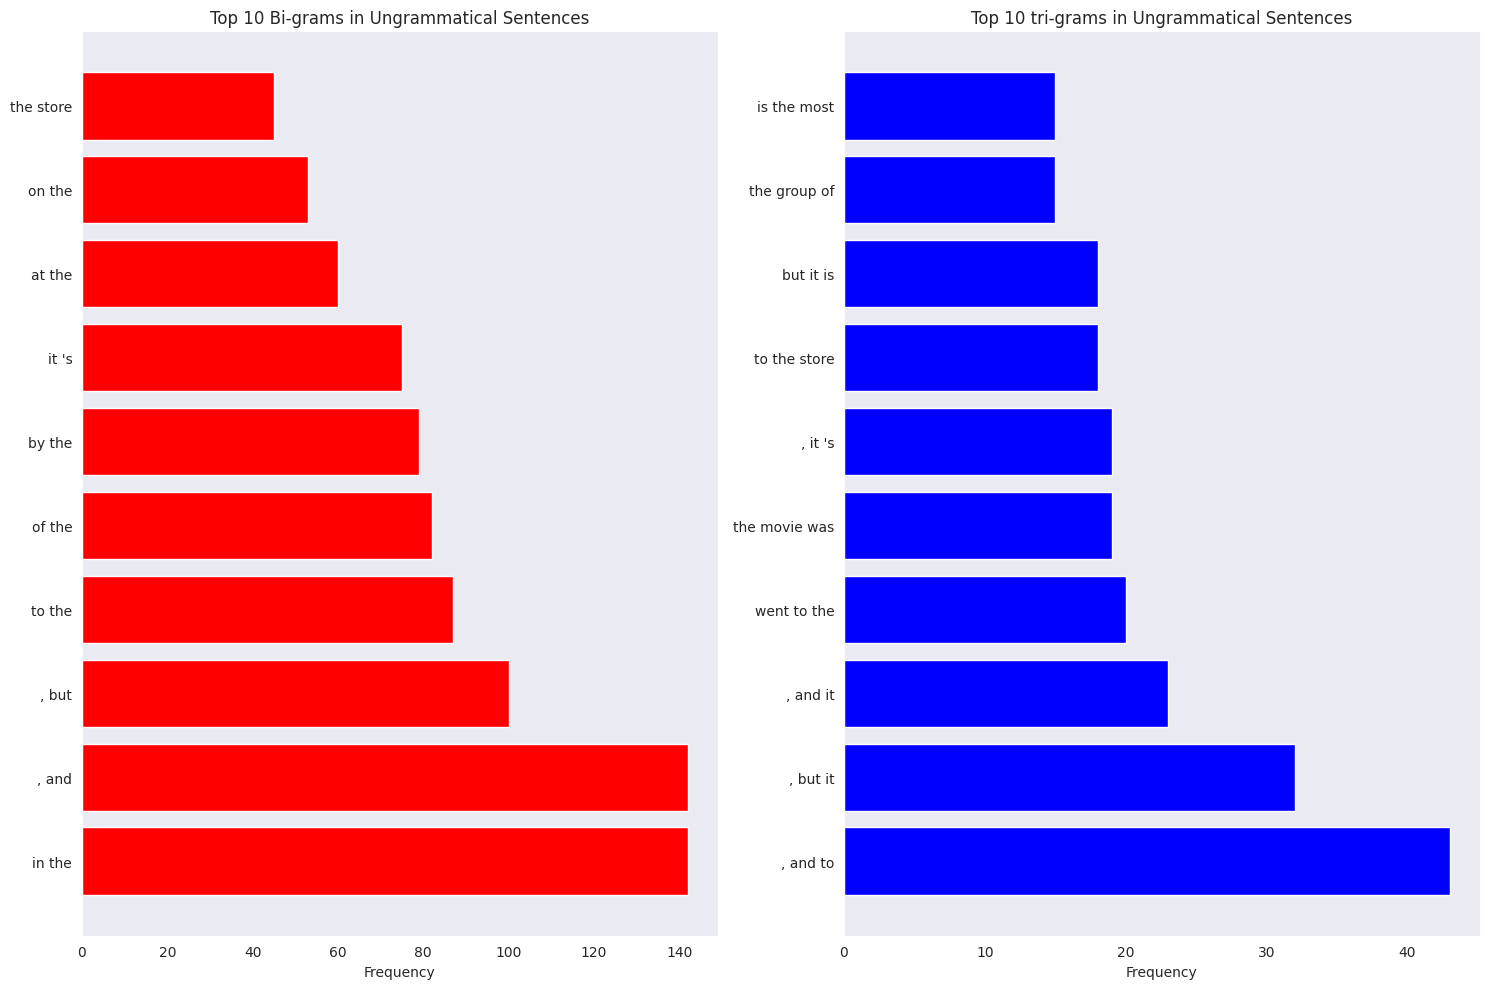

In [30]:
bi_grams, bi_freq = zip(*most_common_bi)
tri_grams, tri_freq = zip(*most_common_tri)

#converting n gram tuples to strings
bi_grams_str = [' '.join(gram) for gram in bi_grams]
tri_grams_str = [' '.join(gram) for gram in tri_grams]

plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.barh(bi_grams_str, bi_freq, color='red')
plt.xlabel('Frequency')
plt.title('Top 10 Bi-grams in Ungrammatical Sentences')

plt.subplot(1, 2, 2)
plt.barh(tri_grams_str, tri_freq, color='blue')
plt.xlabel('Frequency')
plt.title('Top 10 tri-grams in Ungrammatical Sentences')

plt.tight_layout()
plt.show()

In [31]:
!pip install textblob
from textblob import TextBlob
ungrammatical_sentiments = [TextBlob(sentence).sentiment.polarity for sentence in df_new['Ungrammatical Statement']]
corrected_sentiments = [TextBlob(sentence).sentiment.polarity for sentence in df_new['Standard English']]

#calculating average sentiment, compare individual sentence sentiment
avg_ug_sentiment = sum(ungrammatical_sentiments) / len(ungrammatical_sentiments)
avg_corr_sentiment = sum(corrected_sentiments) / len(corrected_sentiments)

print(f'Average Sentiment for Ungrammatical Sentences:{avg_ug_sentiment}')
print(f'Average Sentiment for Corrected Senetences:{avg_corr_sentiment}')


Average Sentiment for Ungrammatical Sentences:0.0987968938340592
Average Sentiment for Corrected Senetences:0.0898120780634406


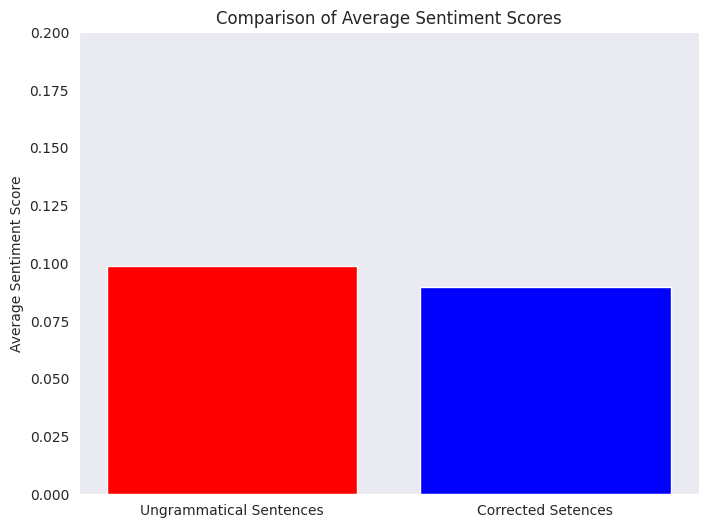

In [32]:
# sentiment scores
scores = [avg_ug_sentiment, avg_corr_sentiment]
labels = ['Ungrammatical Sentences', 'Corrected Setences']

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['red', 'blue'])
plt.ylabel('Average Sentiment Score')
plt.title('Comparison of Average Sentiment Scores')
plt.ylim(0, 0.2)
plt.show()

In [33]:
###Correction Pattern Mining

In [34]:
from nltk import word_tokenize

nltk.download('punkt')

def align_and_find_changes(sentence1, sentence2):
  tokens1 = word_tokenize(sentence1)
  tokens2 = word_tokenize(sentence2)
  max_len = max(len(tokens1), len(tokens2))
  aligned_tokens1 = tokens1 + [''] * (max_len - len(tokens1))
  aligned_tokens2 = tokens2 + [''] * (max_len - len(tokens2))

  changes = []
  for token1, token2 in zip(aligned_tokens1, aligned_tokens2):
    if token1 != token2:
      changes.append((token1, token2))
  return changes

#apply the function to each pair of sentences
df_new['Changes'] = df_new.apply(lambda row: align_and_find_changes(row['Ungrammatical Statement'], row['Standard English']), axis=1)
df_new.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Statement Length,Standard English Length,Changes
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,"[(goes, go)]"
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,"[(was, were)]"
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,"[(have, has)]"
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,"[(do, does)]"
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,"[(rise, rises)]"


In [35]:
from collections import Counter

# Flatten the list of changes and count the occurrences
all_changes = [change for changes in df_new['Changes'] for change in changes]
change_counter = Counter(all_changes)

# Display the most common changes
most_common_changes = change_counter.most_common(20)
print("Most Common Changes:")
for change, frequency in most_common_changes:
    print(f"{change}: {frequency}")

Most Common Changes:
('.', ''): 661
('', '.'): 351
('a', 'the'): 63
(',', '.'): 56
(',', 'and'): 46
('was', 'were'): 41
('the', '.'): 41
('but', ''): 41
('the', ''): 40
('it', 'its'): 38
('no', 'any'): 34
('is', ''): 31
('...', ','): 28
('in', 'the'): 25
('it', '.'): 24
(',', 'was'): 22
('the', 'in'): 21
('a', ''): 20
('of', 'the'): 19
('they', 'their'): 19


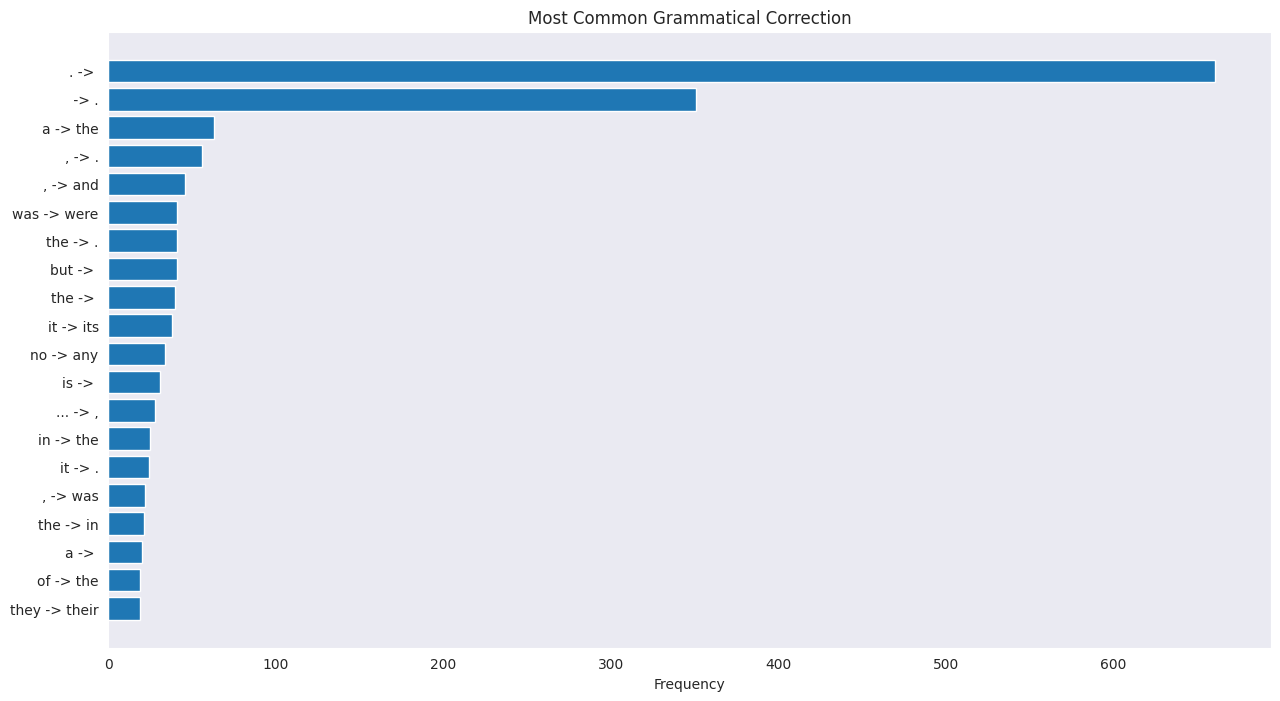

In [36]:
changes, frequencies = zip(*most_common_changes)

#convert change tuples to string format for labeling
change_labels = [f'{original} -> {corrected}' for original, corrected in changes]

plt.figure(figsize=(15,8))
plt.barh(change_labels, frequencies)
plt.xlabel('Frequency')
plt.title('Most Common Grammatical Correction')
plt.gca().invert_yaxis()
plt.show()


In [37]:
def categorize_change(change):
  original, corrected = change
  if original == '':
    return 'Insertion'
  elif corrected == '':
    return 'Deletion'
  else:
    return 'Substitution'

df_new['Change Types'] = df_new['Changes'].apply(lambda chnages: [categorize_change(change) for change in changes])
df_new.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Statement Length,Standard English Length,Changes,Change Types
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,"[(goes, go)]","[Deletion, Insertion, Substitution, Substituti..."
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,"[(was, were)]","[Deletion, Insertion, Substitution, Substituti..."
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,"[(have, has)]","[Deletion, Insertion, Substitution, Substituti..."
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,"[(do, does)]","[Deletion, Insertion, Substitution, Substituti..."
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,"[(rise, rises)]","[Deletion, Insertion, Substitution, Substituti..."


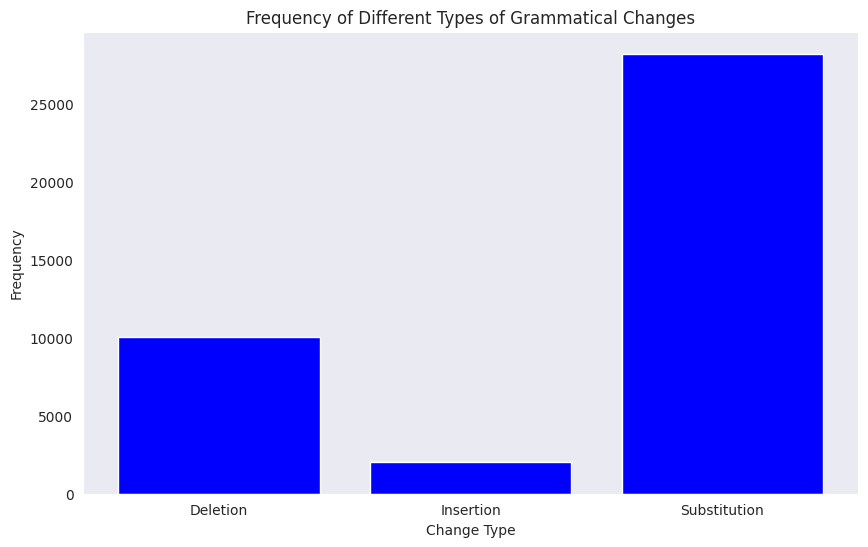

In [38]:
from collections import Counter

change_type_counter = Counter([change_type for change_types in df_new['Change Types'] for change_type in change_types])

change_types, frequencies = zip(*change_type_counter.items())

plt.figure(figsize=(10, 6))
plt.bar(change_types, frequencies, color='blue')
plt.xlabel('Change Type')
plt.ylabel('Frequency')
plt.title('Frequency of Different Types of Grammatical Changes')
plt.show()

In [39]:
### contexual Analysis

In [40]:
context_window = 2

def extract_context(sentence, index, window):
  words = nltk.word_tokenize(sentence)
  start = max(0, index - window)
  end = min(len(words), index + window + 1)
  return ' '.join(words[start:end])

df_new['Contexts'] = df_new.apply(lambda row: [extract_context(row['Ungrammatical Statement'], i, context_window) for i, _ in enumerate(nltk.word_tokenize(row['Ungrammatical Statement'])) if (row['Ungrammatical Statement'][i], row['Standard English'][i]) in row['Changes']], axis=1)
df_new.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Statement Length,Standard English Length,Changes,Change Types,Contexts
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,"[(goes, go)]","[Deletion, Insertion, Substitution, Substituti...",[]
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,"[(was, were)]","[Deletion, Insertion, Substitution, Substituti...",[]
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,"[(have, has)]","[Deletion, Insertion, Substitution, Substituti...",[]
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,"[(do, does)]","[Deletion, Insertion, Substitution, Substituti...",[]
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,"[(rise, rises)]","[Deletion, Insertion, Substitution, Substituti...",[]


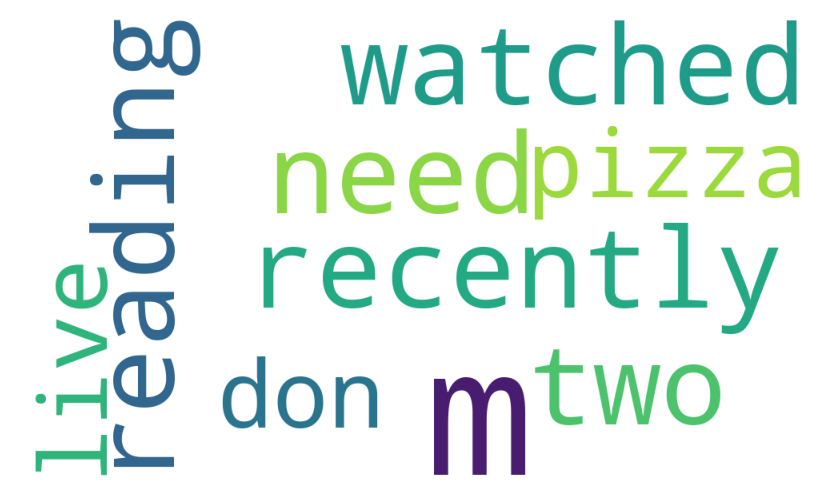

In [41]:
!pip install wordcloud
from wordcloud import WordCloud

#flatten the list of contexts
all_contexts = [context for contexts in df_new['Contexts'] for context in contexts]

#join all context into a single string
all_contexts_string = ' '.join(all_contexts)

wordcloud = WordCloud(width = 1000, height = 600, background_color ='white', min_font_size = 10).generate(all_contexts_string)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [42]:
################### GRAMMAR CORRECTION WITh T5 MODEL ########################

In [43]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.2 MB/s eta 0:00:00


In [44]:
import torch
import optuna
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset, DataLoader
from nltk.translate.bleu_score import sentence_bleu
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import SmoothingFunction
from transformers import T5Tokenizer, T5ForConditionalGeneration

#setting the device to cuda if available else cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

text_df = pd.read_csv("/content/Grammar Correction.csv", sep=",")


In [45]:
text_df.head(10)

,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.
5,6,Verb Tense Errors,I am eat pizza for lunch.,I am eating pizza for lunch.
6,7,Verb Tense Errors,The students studies for the exam.,The students study for the exam.
7,8,Verb Tense Errors,The car need to be repaired.,The car needs to be repaired.
8,9,Verb Tense Errors,She will goes to the party tonight.,She will go to the party tonight.
9,10,Verb Tense Errors,They watches the movie together.,They watch the movie together.


Text(0, 0.5, 'Error Type')

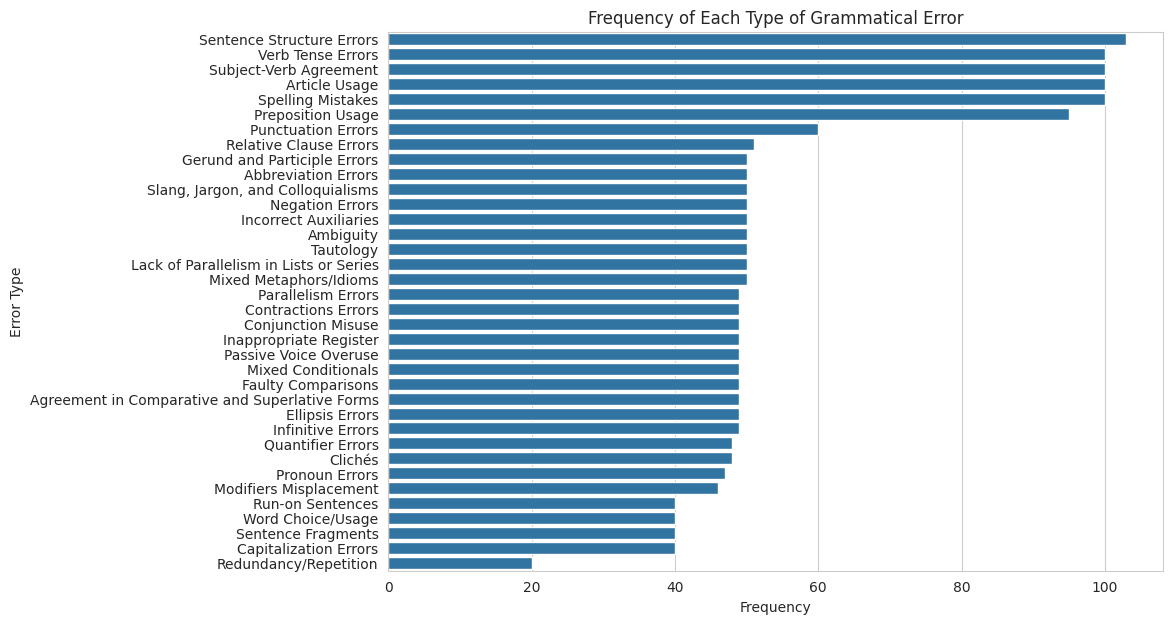

In [46]:
#displaying the shape of the dataset to understand the number of rows and columns in the dataset
sns.set_style("whitegrid")
plt.figure(figsize = (10, 7))
error_type_plot = sns.countplot(y = text_df["Error Type"], order = text_df["Error Type"].value_counts().index)
error_type_plot.set_title("Frequency of Each Type of Grammatical Error")
error_type_plot.set_xlabel("Frequency")
error_type_plot.set_ylabel('Error Type')

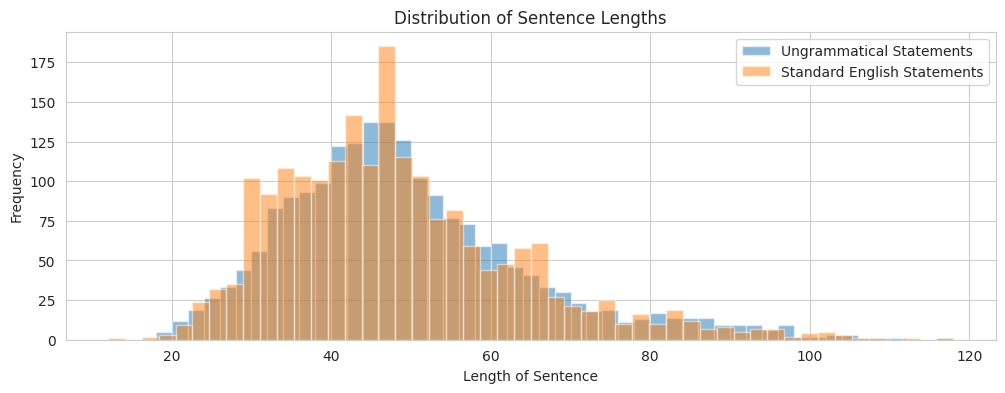

In [47]:
#adding the length of the ungrammatical and standard English statements to the dataset
text_df["Ungrammatical Length"] = text_df["Ungrammatical Statement"].apply(len)
text_df["Standard Length"] = text_df['Standard English'].apply(len)

#displaying the distribution of sentence lengths for the lengths for the ungrammatical and standard English statements
plt.figure(figsize = (12, 4))
plt.hist(text_df['Ungrammatical Length'], bins = 50, alpha = 0.5, label= "Ungrammatical Statements")
plt.hist(text_df["Standard Length"], bins = 50, alpha = 0.5, label = "Standard English Statements")
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Length of Sentence")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Detecing and classifying error types with custom CNN model.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load the dataset
df = pd.read_csv('/content/Grammar Correction.csv')
error_types = df['Error Type'].tolist()
wrong_sentences = df['Ungrammatical Statement'].tolist()

In [3]:
# Encode the error types
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(error_types)

# Split the dataset into train, validation, and test sets
train_sentences, test_sentences, train_labels, test_labels = train_test_split(wrong_sentences,
                                                                              encoded_labels,
                                                                              test_size=0.2,
                                                                              random_state=42)
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_sentences,
                                                                            train_labels,
                                                                            test_size=0.2,
                                                                            random_state=42)

In [4]:
# Define the custom CNN-based text classifier
class GrammarErrorClassifier(nn.Module):
    def __init__(self, num_classes, vocab_size, embedding_dim=128, kernel_sizes=[3, 4, 5], num_filters=128):
        super().__init__()
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([nn.Conv1d(in_channels=embedding_dim, out_channels=num_filters, kernel_size=k) for k in kernel_sizes])
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(len(kernel_sizes) * num_filters, num_classes)

    def forward(self, input_ids):
        embedded = self.embedding(input_ids).transpose(1, 2)
        conved = [nn.ReLU()(conv(embedded)) for conv in self.convs]
        pooled = [self.pool(c).squeeze(-1) for c in conved]
        cat = torch.cat(pooled, dim=1)
        out = self.fc(cat)
        return out

In [5]:
# Tokenize the sentences
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_sentences, padding=True, truncation=True, max_length=256, return_tensors='pt')
val_encodings = tokenizer(val_sentences, padding=True, truncation=True, max_length=256, return_tensors='pt')
test_encodings = tokenizer(test_sentences, padding=True, truncation=True, max_length=256, return_tensors='pt')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
# Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(train_encodings.input_ids, torch.tensor(train_labels))
val_dataset = TensorDataset(val_encodings.input_ids, torch.tensor(val_labels))
test_dataset = TensorDataset(test_encodings.input_ids, torch.tensor(test_labels))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [7]:
# Initialize the model, optimizer, and loss function
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GrammarErrorClassifier(num_classes=len(label_encoder.classes_), vocab_size=len(tokenizer)).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

In [21]:
train_losses = []
val_accs = []
test_losses = []

# Training loop
num_epochs = 10
best_val_acc = 0

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, labels = [t.to(device) for t in batch]
        optimizer.zero_grad()
        outputs = model(input_ids)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_losses.append(total_loss / len(train_loader))

    # Evaluate on the validation set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids, labels = [t.to(device) for t in batch]
            outputs = model(input_ids)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = correct / total
    val_accs.append(val_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}, Val Acc: {val_acc:.4f}')

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')

# Evaluate on the test set
    test_loss = 0
    with torch.no_grad():
        for batch in test_loader:
            input_ids, labels = [t.to(device) for t in batch]
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    test_loss = test_loss / len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}, Val Acc: {val_acc:.4f}, Test Loss: {test_loss:.4f}')

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')


Epoch [1/10], Loss: 0.0230, Val Acc: 0.6285
Epoch [1/10], Loss: 0.0230, Val Acc: 0.6285, Test Loss: 1.5039
Epoch [2/10], Loss: 0.0212, Val Acc: 0.6223
Epoch [2/10], Loss: 0.0212, Val Acc: 0.6223, Test Loss: 1.5012
Epoch [3/10], Loss: 0.0201, Val Acc: 0.6285
Epoch [3/10], Loss: 0.0201, Val Acc: 0.6285, Test Loss: 1.5054
Epoch [4/10], Loss: 0.0208, Val Acc: 0.6254
Epoch [4/10], Loss: 0.0208, Val Acc: 0.6254, Test Loss: 1.5090
Epoch [5/10], Loss: 0.0181, Val Acc: 0.6285
Epoch [5/10], Loss: 0.0181, Val Acc: 0.6285, Test Loss: 1.5101
Epoch [6/10], Loss: 0.0171, Val Acc: 0.6254
Epoch [6/10], Loss: 0.0171, Val Acc: 0.6254, Test Loss: 1.5144
Epoch [7/10], Loss: 0.0164, Val Acc: 0.6316
Epoch [7/10], Loss: 0.0164, Val Acc: 0.6316, Test Loss: 1.5138
Epoch [8/10], Loss: 0.0159, Val Acc: 0.6130
Epoch [8/10], Loss: 0.0159, Val Acc: 0.6130, Test Loss: 1.5190
Epoch [9/10], Loss: 0.0168, Val Acc: 0.6285
Epoch [9/10], Loss: 0.0168, Val Acc: 0.6285, Test Loss: 1.5201
Epoch [10/10], Loss: 0.0143, Val Acc:

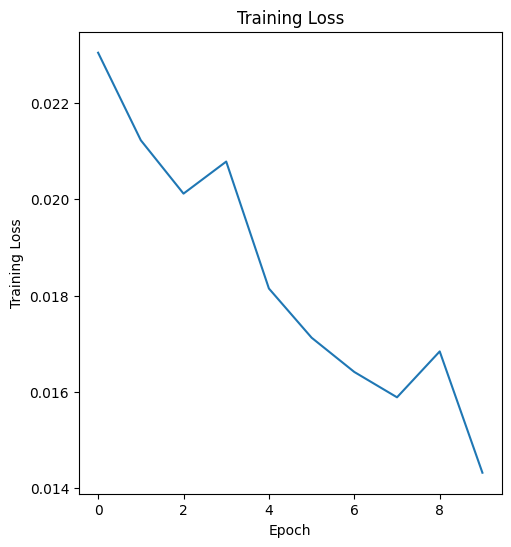

In [22]:
import matplotlib.pyplot as plt
# Plot the training loss and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss')

plt.show()

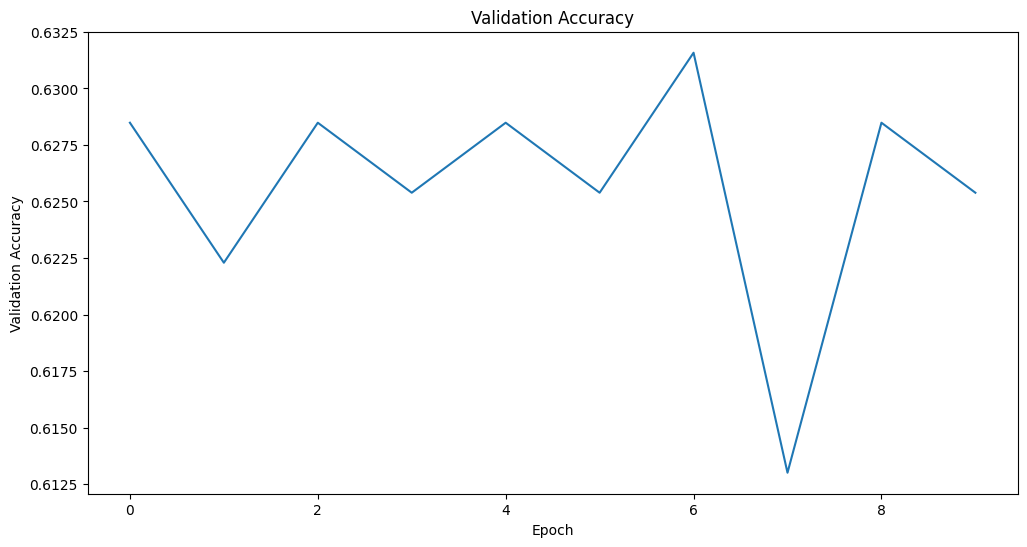

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(val_accs)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy')

plt.show()

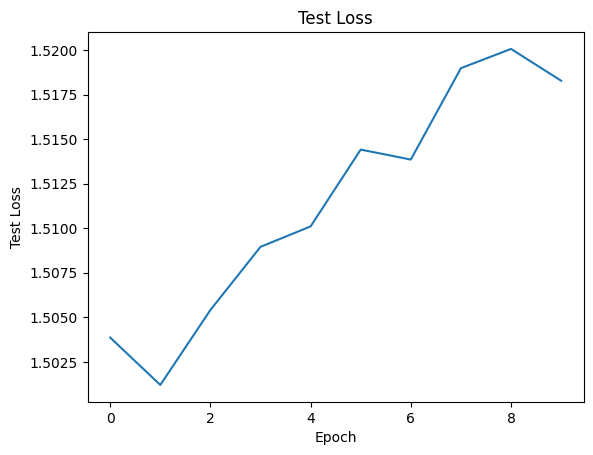

In [24]:
plt.figsize=(12, 6)
plt.plot(test_losses)
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.title('Test Loss')

plt.show()

In [32]:
import torch

try:
    model.load_state_dict(torch.load('/content/best_model.pth'))
except RuntimeError as e:
    print(f"Error loading the model: {e}")

<ipython-input-32-a87cf8f12edd>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/best_model.pth'))


In [39]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer

# Load the pre-trained model and tokenizer

model = torch.jit.load('/content/best_model.pth')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()

# Define the error classes
error_classes = df['Error Type'].unique()

def detect_errors(text):
    # Tokenize the input text
    input_ids = tokenizer.encode(text, return_tensors='pt').to(device)

    # Get the model's prediction
    with torch.no_grad():
        output = model(input_ids)[0]
        _, predicted = torch.max(output, 1)

    # Get the predicted error class
    predicted_error = error_classes[predicted.item()]

    return predicted_error

# Example usage
while True:
    user_input = input("Enter a sentence (or 'q' to quit): ")
    if user_input.lower() == 'q':
        break

    error_type = detect_errors(user_input)
    print(f"Detected error: {error_type}")

RuntimeError: PytorchStreamReader failed locating file constants.pkl: file not found

In [12]:
# After the training loop
# Load the best model checkpoint
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Evaluate on the test set
correct = 0
total = 0
test_loss = 0
with torch.no_grad():
    for batch in test_loader:
        input_ids, labels = [t.to(device) for t in batch]
        outputs = model(input_ids)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total
test_loss = test_loss / len(test_loader)

print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Test Accuracy: 0.5990
Test Loss: 1.4825


<ipython-input-12-16350c48d4c8>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


In [ ]:
# loading the pre-trained T5 model and tokenizer from the Hugging Face
# Transformers library and set the shared parameters
# (as freezing those parameters defined during the pre-trained stage
# to avoid catastrophic forgetting) to False

model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

# setting the shared parameters to False
for param in model.shared.parameters():
  param.requires_grad = False

In [ ]:
# defining the GrammarCorrectionDataset class for the dataset
class GrammarCorrectionDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    # return the ungrammatical statement and the standard English statement
    def __getitem__(self, idx):
        ungrammatical_statement = self.dataframe.iloc[idx]["Ungrammatical Statement"]
        standard_english = self.dataframe.iloc[idx]["Standard English"]
        return ungrammatical_statement, standard_english

In [ ]:
# spliting the dataset into training, validation, and test sets with 80%, 10%, and 10%
train_df, test_df = train_test_split(df, test_size = 0.2)
train_df, val_df = train_test_split(train_df, test_size = 0.1)

# Create the datasets
train_dataset = GrammarCorrectionDataset(train_df)
val_dataset = GrammarCorrectionDataset(val_df)
test_dataset = GrammarCorrectionDataset(test_df)

In [ ]:
# Lists to store metrics*****************************************************
train_losses = []
val_bleu_scores = []

In [ ]:
#defining the train_epoch function to train the model for one epoch
def train_epoch(model, dataloader, optimizer, device, scheduler):
  #setting the model to the device
  model = model.to(device)
  #setting the model to training mode
  model.train()
  #initializing the toal loss to 0
  total_loss = 0
  # iterate over the dataloader to get the ungrammatical statement and the standard English statement
  for ungrammatical_statement, standard_english in dataloader:
    #move the inputs and labels to the device, set the configurations for the tokenizer, and get the outputs form the model
    inputs = tokenizer(ungrammatical_statement, return_tensors = "pt", padding= True, truncation=True, max_length = 256).to(device)
    labels = tokenizer(standard_english, return_tensors = "pt", padding = True, truncation = True, max_length = 256).input_ids.to(device)
    outputs = model(**inputs, labels = labels)
    # getting the loss from the outputs and add it to the total loss
    loss = outputs.loss
    total_loss += loss.item()
    #backpropagate the loss and update the optimizer
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    #updating the scheduler
    scheduler.step()
    #calculating the average loss
    average_loss = total_loss/ len(dataloader)
    print(f"Average Loss: {average_loss}")
    return average_loss

In [ ]:
#defining the eval_model function to evaluate the model on the validation or test set
def eval_model(model, dataloader, device):
#setting the model to device
  model = model.to(device)
  #setting the model to evaulation mode
  model.eval()
  #initializing the total BLEU score to 0
  total_bleu_score = 0
  #setting the smoothing function to method1
  smoothing = SmoothingFunction().method1
  with torch.no_grad():
    # iterating over the dataloader to get the ungrammatical statement and the standard English statement
    for ungrammatical_statement, standard_english in dataloader:
    #moving the inputs and labels to the device,set the configuration for the tokenizer, and get the outputs from the model
      inputs = tokenizer(ungrammatical_statement, return_tensors = "pt", padding = True, truncation = True, max_length = 256).to(device)
      labels = tokenizer(standard_english, return_tensors = "pt", padding = True, truncation = True, max_length = 256).input_ids.to(device)
      outputs = model.generate(**inputs, max_new_tokens = 256)
      #decoding the outputs and calculating the BLEU score
      corrected_english = tokenizer.decode(outputs[0], skip_special_tokens = True)
      reference = [standard_english[0].split()]
      candidate = corrected_english.split()
      bleu_score = sentence_bleu(reference, candidate, smoothing_function = smoothing)
      total_bleu_score += bleu_score
  average_bleu_score = total_bleu_score / len(dataloader)
  print(f"Average BLEU SCORE: {average_bleu_score}")
  return average_bleu_score

In [ ]:
# using optuna to tune the hyperparameters of the model and optimizer to improve the BLEU score on the validation set with 10 trials
def objective(trial):


  # defining the hyperparameters to tune
  learning_rate = trial.suggest_float("learning_rate", 1e-6, 1e-4, log=True)
  num_train_epochs = trial.suggest_int("num_train_epochs", 1, 5)
  batch_size = trial.suggest_categorical("batch_size", [4, 8, 16, 32])

  #loading the pre-traqined T5 model and tokenizer from the Hugging Face Transformers library
  tokenizer = T5Tokenizer.from_pretrained("t5-base")
  model = T5ForConditionalGeneration.from_pretrained("t5-base")
  #setting the shared parameters to False
  for param in model.shared.parameters():
    param.requires_grad = False

  #setting the optimizer and scheduler
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
  scheduler = StepLR(optimizer, step_size = 1, gamma = 0.1)

  #creating the DataLoader for the training and validation
  train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
  val_dataloader = DataLoader(val_dataset, batch_size = batch_size, shuffle = True)
  test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

  #training the model for the specified number of epochs
  for epoch in range(num_train_epochs):
    #training the model for one epoch and print the average loss
    average_loss = train_epoch(model, train_dataloader, optimizer, device, scheduler)

    # Store the training loss
    train_losses.append(average_loss)

    print(f"Epoch: {epoch+1}, Loss: {average_loss}")
    eval_model(model, val_dataloader, device)

    # evaluating the model with the validation set and the return the average BLEU score
    average_bleu_score = eval_model(model, test_dataloader, device)
    # Store the validation BLEU score
    val_bleu_scores.append(average_bleu_score)
    return average_bleu_score


  #creating the model with the validation set and return the average BLEU score
  average_bleu_score = eval_model(model, test_dataloader, device)
  return average_bleu_score


# creating a study and optimize the objective function with 5 trials
study = optuna.create_study(direction = "maximize", pruner = optuna.pruners.MedianPruner())
study.optimize(objective, n_trials = 1)
#printing the hyperparameters
print(study.best_params)

In [ ]:
import matplotlib.pyplot as plt

def plotting(train_array, val_array):
  # Plotting the training loss and validation BLEU score
  plt.figure(figsize=(12, 6))

  # Training Loss Plot
  plt.subplot(1, 2, 1)
  plt.plot(train_losses, label='Training Loss', color='blue', marker='o')
  plt.title('Training Loss over Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Average loss')
  plt.legend()

  # Validation BLEU Score Plot
  plt.subplot(1, 2, 2)
  plt.plot(val_bleu_scores, label='Validation BLEU Score', color='orange', marker='o')
  plt.title('Validation BLEU Score over Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('BLEU Score')
  plt.legend()

  plt.tight_layout()
  plt.show()
print(f"Plotting the graphs before the hypertuning the parameters")
plotting(train_losses, val_bleu_scores)

In [ ]:
#loading the pre-trained T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

#setting the shared parameters to False
for param in model.shared.parameters():
  param.requires_grad = False

#setting the device to cuda if available or else cpu
model.to(device)

In [ ]:
#gettting the best hyperparameters from the study
learning_rate = study.best_params["learning_rate"]
num_train_epochs = study.best_params["num_train_epochs"]
per_device_train_batch_size = study.best_params["batch_size"]

#setting the optimizer and scheduler with the best hyperparameters
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size = 1, gamma = 0.1)

#creating the DataLoader for the training, validation, and test set5s with the best hyperparameters (the batch size)
train_dataloader = DataLoader(train_dataset, batch_size = per_device_train_batch_size, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = per_device_train_batch_size, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = per_device_train_batch_size, shuffle = True)

#training the model and the specified number of epochs with the best hyperparametes and evaluate the model on the validation adn test sets
for epoch in range(num_train_epochs):
  average_loss = train_epoch(model, train_dataloader, optimizer, device, scheduler)
  print(f"Epoch: {epoch+1}, Loss {average_loss}")
  eval_model(model, val_dataloader, device)

#evaluating the model on the test set with the best hyperparameters and print the average BLEU score
eval_model(model, test_dataloader, device)


In [ ]:
print(f"Plotting the graphs after the hypertuning the parameters")
plotting(train_losses, val_bleu_scores)

In [ ]:
#implementing the fine-tunes model on the dataset to correct the ungrammatical statements
def correct_grammar(model, ungrammatical_statement):
  #setting the model to evaluation
  model.eval()
  #tokenizing the ungrammatical statements and getting the outputs from the model
  inputs = tokenizer(ungrammatical_statement, return_tensors = "pt", padding = True, truncation = True, max_length =256).to(device)
  outputs = model.generate(**inputs, max_new_tokens = 256)
  #decoding the outputs and return the corrected English statement
  corrected_english = tokenizer.decode(outputs[0], skip_special_tokens = True)
  return corrected_english

#correcting the ungrammatical statements in the dataset
test_df["Corrected English"] = text_df["Ungrammatical Statement"].apply(lambda x: correct_grammar(model, x))

In [ ]:
test_df.head(20)

In [ ]:
text_df.tail(20)

In [ ]:
!pip install happytransformer
from happytransformer import HappyTextToText, TTSettings

In [ ]:
# Load the T5 model and tokenizer
happy_tt = HappyTextToText("T5", "google-t5/t5-base")
tokenizer = happy_tt.tokenizer

def generate_text(input_text, happy_tt, beam_settings):
    """
    Generate corrected text using the T5 model and Happy Transformer.

    Args:
        input_text (str): The input text that needs grammar correction.
        happy_tt (HappyTextToText): The initialized HappyTextToText object.
        beam_settings (TTSettings): Beam search settings.

    Returns:
        str: The corrected text generated by the model.
    """
    input_text = "grammar: " + input_text  # Grammar correction prefix for T5
    result = happy_tt.generate_text(input_text, args=beam_settings)
    return result.text

# Define the beam search settings
beam_settings = TTSettings(num_beams=5, min_length=1, max_length=20)

In [ ]:
example_1 = "He's just tip of the iceberg."
result_1 = generate_text(example_1, happy_tt, beam_settings)
print(result_1)

In [ ]:
example_2 = "is he have a car"
result_2 = generate_text(example_2, happy_tt, beam_settings)
print(result_2)